In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataframe = pd.read_csv('/content/drive/MyDrive/DDoSdata.csv')

dataframe.describe()

<ipython-input-26-ac9c494505fe>:1: DtypeWarning: Columns (8,10) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframe = pd.read_csv('/content/drive/MyDrive/DDoSdata.csv')


,Unnamed: 0,pkSeqID,stime,flgs_number,proto_number,pkts,bytes,state_number,ltime,seq,...,TnP_Per_Dport,AR_P_Proto_P_SrcIP,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack
count,1.927101e+06,1.927101e+06,1.927101e+06,1.927101e+06,1.927101e+06,1.927101e+06,1.927101e+06,1.927101e+06,1.927101e+06,1.927101e+06,...,1.927101e+06,1.927101e+06,1.927101e+06,1.927101e+06,1.927101e+06,1.927101e+06,1.927101e+06,1.927101e+06,1.927101e+06,1.927101e+06
mean,2.613812e+06,2.613811e+06,1.528097e+09,1.442916e+00,1.984566e+00,7.913937e+00,1.126113e+03,3.043337e+00,1.528097e+09,1.232456e+05,...,7.340666e+02,1.337962e+00,1.806924e+00,9.988476e+01,8.194398e+01,8.421088e-01,1.418524e+00,6.771640e+02,5.741962e+02,9.997525e-01
std,5.563069e+05,5.563063e+05,2.756896e+04,6.024243e-01,9.998889e-01,1.591975e+02,1.548951e+05,1.191149e+00,2.756568e+04,7.380114e+04,...,8.333697e+02,8.717285e+01,2.242319e+02,2.628704e+00,2.422842e+01,6.318281e+01,6.320693e+01,5.036687e+02,4.717024e+02,1.573089e-02
min,1.650261e+06,1.650261e+06,1.526344e+09,1.000000e+00,1.000000e+00,1.000000e+00,6.000000e+01,1.000000e+00,1.526344e+09,1.000000e+00,...,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,2.132037e+06,2.132036e+06,1.528096e+09,1.000000e+00,1.000000e+00,5.000000e+00,4.200000e+02,3.000000e+00,1.528096e+09,6.004700e+04,...,5.000000e+02,3.594890e-01,3.703380e-01,1.000000e+02,6.800000e+01,3.502690e-01,3.703120e-01,3.650000e+02,2.680000e+02,1.000000e+00
50%,2.613812e+06,2.613811e+06,1.528096e+09,1.000000e+00,1.000000e+00,7.000000e+00,6.160000e+02,3.000000e+00,1.528096e+09,1.202690e+05,...,6.820000e+02,5.410290e-01,5.497720e-01,1.000000e+02,9.700000e+01,5.437660e-01,5.496870e-01,6.270000e+02,5.000000e+02,1.000000e+00
75%,3.095588e+06,3.095586e+06,1.528099e+09,2.000000e+00,3.000000e+00,1.000000e+01,7.800000e+02,4.000000e+00,1.528099e+09,1.831610e+05,...,9.520000e+02,7.588950e-01,7.534680e-01,1.000000e+02,1.000000e+02,7.286400e-01,7.534480e-01,9.480000e+02,7.840000e+02,1.000000e+00
max,3.577363e+06,3.577361e+06,1.528103e+09,7.000000e+00,5.000000e+00,7.005700e+04,7.183334e+07,8.000000e+00,1.528103e+09,2.621680e+05,...,2.444250e+05,8.695650e+04,1.818180e+05,1.000000e+02,1.000000e+02,8.695650e+04,8.695650e+04,1.125440e+05,1.179390e+05,1.000000e+00


In [ ]:
dataframe.head()

,Unnamed: 0,pkSeqID,stime,flgs,flgs_number,proto,proto_number,saddr,sport,daddr,...,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack,category,subcategory
0,1650261,1650261,1.528103e+09,e,1,tcp,1,192.168.100.150,54110,192.168.100.3,...,1.21662,40,38,1.56093,1.21662,328,308,1,DDoS,HTTP
1,1650262,1650262,1.528103e+09,e,1,tcp,1,192.168.100.150,54112,192.168.100.3,...,1.21662,40,38,1.56107,1.21662,328,308,1,DDoS,HTTP
2,1650263,1650263,1.528103e+09,e,1,tcp,1,192.168.100.150,54114,192.168.100.3,...,1.21662,40,38,1.24980,1.21662,328,308,1,DDoS,HTTP
3,1650264,1650264,1.528103e+09,e,1,tcp,1,192.168.100.150,54116,192.168.100.3,...,1.21662,40,38,1.24986,1.21662,328,308,1,DDoS,HTTP
4,1650265,1650265,1.528103e+09,e,1,tcp,1,192.168.100.150,54118,192.168.100.3,...,1.21662,40,38,1.24991,1.21662,328,308,1,DDoS,HTTP


In [ ]:
dataframe.shape

(1927101, 47)

In [ ]:
dataframe.isnull().sum()


,0
Unnamed: 0,0
pkSeqID,0
stime,0
flgs,0
flgs_number,0
proto,0
proto_number,0
saddr,0
sport,0
daddr,0


In [ ]:
print(dataframe['category'].value_counts())


category
DDoS      1926624
Normal        477
Name: count, dtype: int64


In [ ]:
# Separate the dataset into classes
ddos_data = dataframe[dataframe['category'] == 'DDoS']
normal_data = dataframe[dataframe['category'] == 'Normal']

# Sample 50,000 from each class
ddos_sample = ddos_data.sample(n=50000, random_state=42)
normal_sample = normal_data.sample(n=50000, random_state=42, replace=True)

# Combine the samples into a balanced dataset
balanced_dataset = pd.concat([ddos_sample, normal_sample]).reset_index(drop=True)

# Shuffle the balanced dataset to mix DDoS and Normal samples
balanced_dataset = balanced_dataset.sample(frac=1, random_state=42).reset_index(drop=True)

# Check the class distribution
print(balanced_dataset['category'].value_counts())

# Save or use the balanced dataset
print(f"Balanced dataset size: {balanced_dataset.shape}")


category
Normal    50000
DDoS      50000
Name: count, dtype: int64
Balanced dataset size: (100000, 47)


In [ ]:
balanced_dataset.isnull().sum()


,0
Unnamed: 0,0
pkSeqID,0
stime,0
flgs,0
flgs_number,0
proto,0
proto_number,0
saddr,0
sport,0
daddr,0


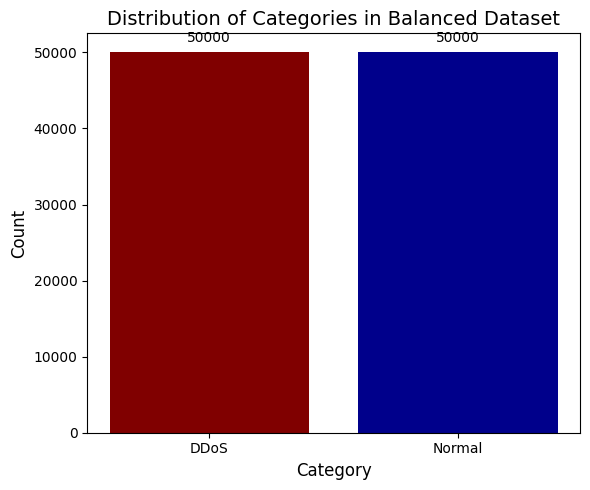

In [ ]:
# Re-importing necessary libraries after reset
import pandas as pd
import matplotlib.pyplot as plt

# Assuming a dataset structure
# For demonstration, let's recreate a similar structure with category values
data = {'category': ['DDoS'] * 50000 + ['Normal'] * 50000}
balanced_dataset = pd.DataFrame(data)

# Count the occurrences of each category
category_counts = balanced_dataset['category'].value_counts()

# Create a bar plot for the category distribution
plt.figure(figsize=(6, 5), dpi=100)
plt.bar(category_counts.index, category_counts.values, color=['#800000', '#00008B'])

# Add labels and title
plt.xlabel('Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Categories in Balanced Dataset', fontsize=14)

# Add value annotations
for i, value in enumerate(category_counts.values):
    plt.text(x=i, y=value + 1000, s=str(value), ha='center', va='bottom', fontsize=10, color='black')

# Display the plot
plt.tight_layout()
plt.show()


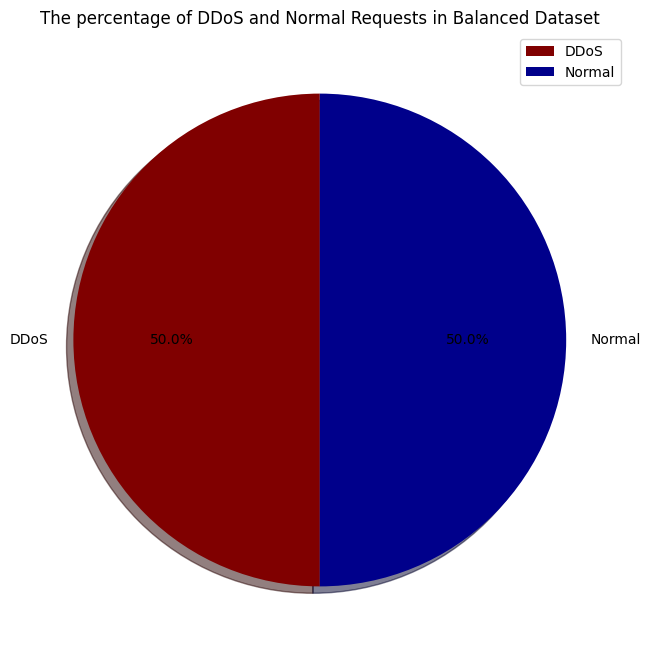

In [ ]:
# Assuming the previous `balanced_dataset` dataframe is available

# Calculate the sizes for the pie chart based on the 'category' column
labels = ["DDoS", "Normal"]
sizes = balanced_dataset['category'].value_counts().values

# Create the pie chart
plt.figure(figsize=(13, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, colors=['#800000', '#00008B'])

# Add legend and title
plt.legend(["DDoS", "Normal"])
plt.title('The percentage of DDoS and Normal Requests in Balanced Dataset')

# Display the plot
plt.show()


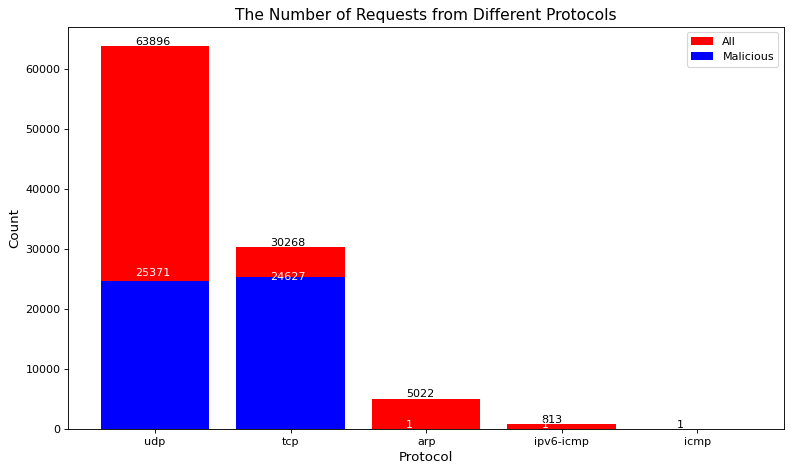

In [ ]:
# Assuming 'balanced_dataset' has a column named 'proto' and 'label' for categorization

# Generate example counts (replace with actual calculations)
all_protocol_counts = balanced_dataset['proto'].value_counts()
malicious_protocol_counts = balanced_dataset[balanced_dataset['category'] == 'DDoS']['proto'].value_counts()

# Create the bar chart
plt.figure(figsize=(10, 6), dpi=80)
plt.bar(all_protocol_counts.index, all_protocol_counts.values, color='r', label='All')
plt.bar(malicious_protocol_counts.index, malicious_protocol_counts.values, color='b', label='Malicious')

# Adding annotations for the counts on top of the bars
for i, count in enumerate(all_protocol_counts.values):
    plt.text(x=i - 0.15, y=count + 200, s=str(count), color='black', size=10)
for i, count in enumerate(malicious_protocol_counts.values):
    plt.text(x=i - 0.15, y=count + 200, s=str(count), color='white', size=10)

# Labels, title, and legend
plt.xlabel('Protocol', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(['All', 'Malicious'])
plt.title('The Number of Requests from Different Protocols', fontsize=14)

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
#1st column is unique and its have no impact on dependent variable so removed

balanced_dataset.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
#Checking unique value of dependent column

balanced_dataset['category'].unique()

array(['DDoS', 'Normal'], dtype=object)

In [ ]:
#Applying the Labelencoding to all categorical columns

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
balanced_dataset["flgs"] = le.fit_transform(balanced_dataset["flgs"])
balanced_dataset["proto"] = le.fit_transform(balanced_dataset["proto"])
balanced_dataset["saddr"] = le.fit_transform(balanced_dataset["saddr"])
balanced_dataset["daddr"] = le.fit_transform(balanced_dataset["daddr"])
balanced_dataset["state"] = le.fit_transform(balanced_dataset["state"])
balanced_dataset["category"] = le.fit_transform(balanced_dataset["category"])
balanced_dataset["subcategory"] = le.fit_transform(balanced_dataset["subcategory"])

In [ ]:
#Changing string value into integer so that dtype can be changed to float

balanced_dataset.loc[balanced_dataset["sport"] == "0x0303", "sport"] = 303
balanced_dataset.loc[balanced_dataset["dport"] == "0x5000", "dport"] = 5000

In [ ]:
#As per requirement changing all column to float

balanced_dataset=balanced_dataset.astype(float)


In [ ]:
balanced_dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 46 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   pkSeqID                           954 non-null    float64
 1   stime                             954 non-null    float64
 2   flgs                              954 non-null    float64
 3   flgs_number                       954 non-null    float64
 4   proto                             954 non-null    float64
 5   proto_number                      954 non-null    float64
 6   saddr                             954 non-null    float64
 7   sport                             954 non-null    float64
 8   daddr                             954 non-null    float64
 9   dport                             954 non-null    float64
 10  pkts                              954 non-null    float64
 11  bytes                             954 non-null    float64
 12  state   

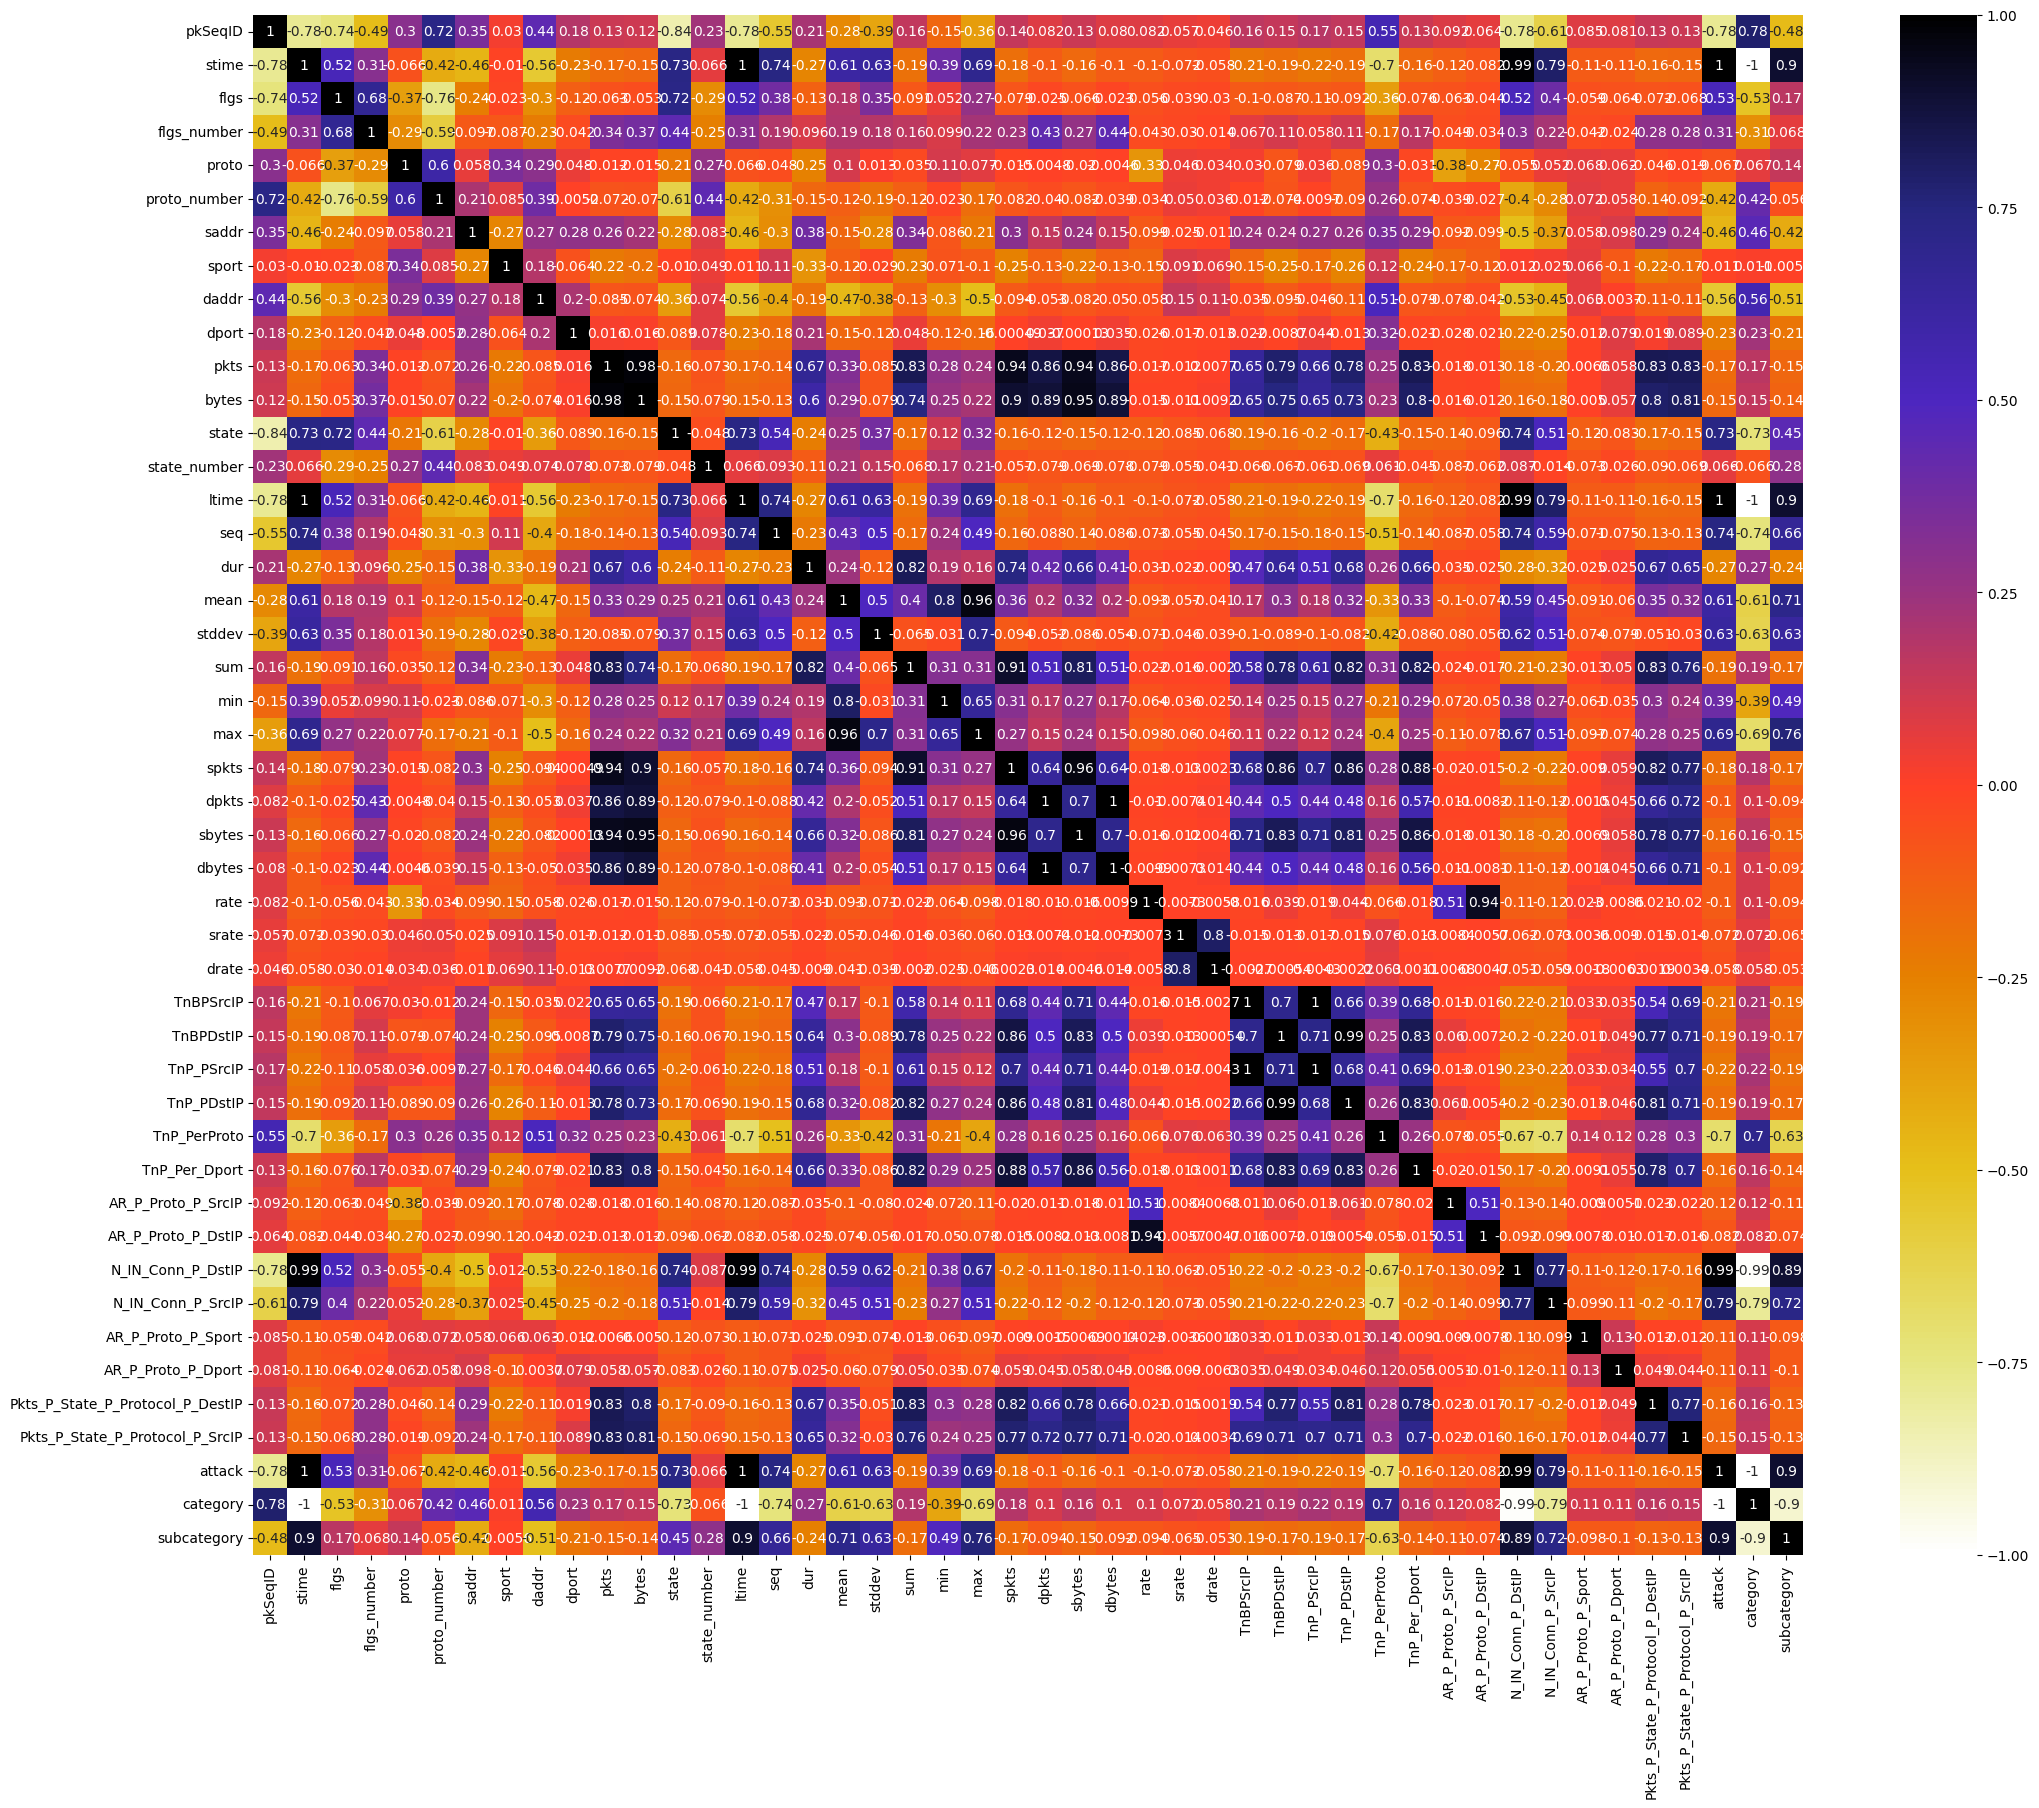

In [ ]:
#Using Pearson Correlation
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(25,20))
cor = balanced_dataset.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [ ]:
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
#Creating new dataframe without dependent column, so we can apply correlation and VarianceThreshold

df_new=balanced_dataset.drop('category',axis=1)

In [ ]:
#Apply threshold 0.70

corr_features = correlation(df_new, 0.70)  # removing columns having high corelation with other columns
print(len(set(corr_features)))
print("\n\n")
print(corr_features)

28



{'attack', 'flgs', 'ltime', 'spkts', 'AR_P_Proto_P_DstIP', 'TnP_PDstIP', 'state', 'bytes', 'TnBPSrcIP', 'Pkts_P_State_P_Protocol_P_SrcIP', 'N_IN_Conn_P_DstIP', 'min', 'seq', 'sum', 'subcategory', 'drate', 'TnP_PSrcIP', 'dbytes', 'max', 'Pkts_P_State_P_Protocol_P_DestIP', 'sbytes', 'dpkts', 'TnP_PerProto', 'TnP_Per_Dport', 'proto_number', 'N_IN_Conn_P_SrcIP', 'stime', 'TnBPDstIP'}


In [ ]:
#Drop of highly correlated columns from dataframe

df_new.drop(corr_features,axis=1,inplace=True)

In [ ]:
df_new.head()

,pkSeqID,flgs_number,proto,saddr,sport,daddr,dport,pkts,state_number,dur,mean,stddev,rate,srate,AR_P_Proto_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport
0,2652177.0,1.0,3.0,2.0,5553.0,16.0,80.0,10.0,4.0,15.038447,3.928101,0.316119,0.598466,0.598466,0.646311,0.664962,0.646311
1,1955774.0,2.0,2.0,2.0,54529.0,16.0,80.0,4.0,3.0,14.682985,1.172167,1.657694,0.204318,0.204318,0.272424,0.272424,0.257414
2,3577249.0,1.0,3.0,6.0,53586.0,42.0,53.0,2.0,2.0,0.156180,0.156180,0.000000,6.402869,0.000000,14.916400,12.805700,0.322581
3,3577245.0,1.0,3.0,1.0,60219.0,21.0,53.0,2.0,4.0,2.501014,0.000000,0.000000,0.399838,0.399838,1.794170,0.799676,0.322581
4,2476516.0,2.0,2.0,2.0,54501.0,16.0,80.0,4.0,3.0,39.051186,0.843426,1.192785,0.076822,0.076822,0.102430,0.102430,0.151321


In [ ]:
# Proccessing for spiliting the data into dependent and indenpendent.

X = df_new
y = balanced_dataset['category']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [ ]:
import pandas as pd
import numpy as np
import time
import psutil
import os
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

# Function to measure memory usage
def get_memory_usage():
    process = psutil.Process(os.getpid())
    return process.memory_info().rss / (1024 ** 2)  # Convert bytes to MB

# Function to evaluate and log model performance
def evaluate_model_detailed(name, model, X_train, y_train, X_test, y_test, is_keras=False, is_sequential=False):
    # Measure training time and memory usage
    start_time = time.time()
    mem_before_train = get_memory_usage()

    if is_keras:
        model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)
    else:
        model.fit(X_train, y_train)

    training_time = time.time() - start_time
    training_memory = abs(get_memory_usage() - mem_before_train)

    # Measure prediction time and memory usage
    start_time = time.time()
    mem_before_pred = get_memory_usage()

    if is_keras:
        y_pred = (model.predict(X_test) > 0.5).astype(int).flatten()
    else:
        y_pred = model.predict(X_test)

    prediction_time = time.time() - start_time
    prediction_memory = abs(get_memory_usage() - mem_before_pred)

    # Evaluate metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Store results
    return {
        "Model": name,
        "Accuracy": accuracy,
        "F1-Score": f1,
        "Training Time (s)": training_time,
        "Training Memory (MB)": training_memory,
        "Prediction Time (s)": prediction_time,
        "Prediction Memory (MB)": prediction_memory,
    }

# Initialize results storage
model_results_detailed = []




In [ ]:
# Logistic Regression
lr = LogisticRegression(max_iter=1000)
model_results_detailed.append(evaluate_model_detailed("Logistic Regression", lr, X_train, y_train, X_test, y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
# KNN
knn = KNeighborsClassifier(n_neighbors=5)
model_results_detailed.append(evaluate_model_detailed("KNN", knn, X_train, y_train, X_test, y_test))


In [ ]:
# Random Forest
rf = RandomForestClassifier(n_estimators=30, max_depth=6, min_samples_split=10, min_samples_leaf=10,
        max_features=0.5, random_state=42)
model_results_detailed.append(evaluate_model_detailed("Random Forest", rf, X_train, y_train, X_test, y_test))

In [ ]:
# XGBoost
xgb = XGBClassifier(n_estimators=30, max_depth=4, learning_rate=0.05, subsample=0.7,
        colsample_bytree=0.7, reg_lambda=2, reg_alpha=1, random_state=42)
model_results_detailed.append(evaluate_model_detailed("XGBoost", xgb, X_train, y_train, X_test, y_test))

In [ ]:
# Neural Network
nn = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_results_detailed.append(evaluate_model_detailed("Neural Network", nn, X_train, y_train, X_test, y_test, is_keras=True))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [ ]:
# LSTM
X_train_seq = X_train.values.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_seq = X_test.values.reshape(X_test.shape[0], 1, X_test.shape[1])

lstm = Sequential([
    LSTM(64, input_shape=(1, X_train.shape[1]), return_sequences=False),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_results_detailed.append(evaluate_model_detailed("LSTM", lstm, X_train_seq, y_train, X_test_seq, y_test, is_keras=True))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [ ]:
# Convert results to DataFrame
results_df_detailed = pd.DataFrame(model_results_detailed)

# Display results
print(results_df_detailed)

In [ ]:
import plotly.graph_objects as go

# Create a beautiful dashboard table using Plotly
dashboard_table = go.Figure(data=[go.Table(
    header=dict(values=list(results_df_detailed.columns),
                fill_color='paleturquoise',
                align='center',
                font=dict(color='black', size=14),
                height=30),
    cells=dict(values=[results_df_detailed[col] for col in results_df_detailed.columns],
               fill_color='lavender',
               align='center',
               font=dict(color='black', size=12),
               height=25))
])

# Update layout for better presentation
dashboard_table.update_layout(
    title="Model Performance Comparison Dashboard",
    title_font_size=20,
    title_x=0.5,
    margin=dict(l=50, r=50, t=50, b=50),
)

# Show the dashboard
dashboard_table.show()


In [ ]:
import pandas as pd
import numpy as np
import time
import psutil
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

# Function to measure memory usage
def get_memory_usage():
    import os
    process = psutil.Process(os.getpid())
    return process.memory_info().rss / (1024 ** 2)  # Convert bytes to MB

# Cross-validation function
def evaluate_model_with_cv(name, model, X, y, n_splits=5, is_keras=False):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

    accuracies = []
    f1_scores = []
    training_times = []
    training_memories = []
    prediction_times = []
    prediction_memories = []

    for train_index, test_index in skf.split(X, y):
        # Handle NumPy arrays or Pandas objects
        if isinstance(X, pd.DataFrame) or isinstance(X, pd.Series):
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        else:
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]

        # Measure training time and memory
        start_time = time.time()
        mem_before_train = get_memory_usage()

        if is_keras:
            model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)
        else:
            model.fit(X_train, y_train)

        training_time = abs(time.time() - start_time)
        training_memory = abs(get_memory_usage() - mem_before_train)

        # Measure prediction time and memory
        start_time = time.time()
        mem_before_pred = get_memory_usage()

        if is_keras:
            y_pred = (model.predict(X_test) > 0.5).astype(int).flatten()
        else:
            y_pred = model.predict(X_test)

        prediction_time = abs(time.time() - start_time)
        prediction_memory = abs(get_memory_usage() - mem_before_pred)

        # Calculate metrics
        accuracies.append(accuracy_score(y_test, y_pred))
        f1_scores.append(f1_score(y_test, y_pred))
        training_times.append(training_time)
        training_memories.append(training_memory)
        prediction_times.append(prediction_time)
        prediction_memories.append(prediction_memory)

    # Return mean metrics across folds
    return {
        "Model": name,
        "Accuracy": np.mean(accuracies),
        "F1-Score": np.mean(f1_scores),
        "Training Time (s)": np.mean(training_times),
        "Training Memory (MB)": np.mean(training_memories),
        "Prediction Time (s)": np.mean(prediction_times),
        "Prediction Memory (MB)": np.mean(prediction_memories),
    }

# Initialize results storage
model_results_cv = []

# Ensure X and y are Pandas objects if they are NumPy arrays
if isinstance(X, np.ndarray):
    X = pd.DataFrame(X)
if isinstance(y, np.ndarray):
    y = pd.Series(y)

# Logistic Regression
lr = LogisticRegression(max_iter=1000)
model_results_cv.append(evaluate_model_with_cv("Logistic Regression", lr, X, y))

# KNN
knn = KNeighborsClassifier(n_neighbors=5)
model_results_cv.append(evaluate_model_with_cv("KNN", knn, X, y))

# Random Forest
rf = RandomForestClassifier(
    n_estimators=30, max_depth=6, min_samples_split=10, min_samples_leaf=10,
    max_features=0.5, random_state=42
)
model_results_cv.append(evaluate_model_with_cv("Random Forest", rf, X, y))

# XGBoost
xgb = XGBClassifier(
    n_estimators=30, max_depth=4, learning_rate=0.05, subsample=0.7,
    colsample_bytree=0.7, reg_lambda=2, reg_alpha=1, random_state=42
)
model_results_cv.append(evaluate_model_with_cv("XGBoost", xgb, X, y))

# Neural Network
nn = Sequential([
    Dense(128, activation='relu', input_shape=(X.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_results_cv.append(evaluate_model_with_cv("Neural Network", nn, X, y, is_keras=True))

# LSTM
X_seq = X.values.reshape(X.shape[0], 1, X.shape[1])
lstm = Sequential([
    LSTM(64, input_shape=(1, X.shape[1]), return_sequences=False),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_results_cv.append(evaluate_model_with_cv("LSTM", lstm, X_seq, y, is_keras=True))

# Convert results to DataFrame
results_df_cv = pd.DataFrame(model_results_cv)

# Display results
print(results_df_cv)



In [ ]:
import plotly.graph_objects as go

# Create a beautiful dashboard table using Plotly
dashboard_table = go.Figure(data=[go.Table(
    header=dict(values=list(results_df_cv.columns),
                fill_color='paleturquoise',
                align='center',
                font=dict(color='black', size=14),
                height=30),
    cells=dict(values=[results_df_cv[col] for col in results_df_cv.columns],
               fill_color='lavender',
               align='center',
               font=dict(color='black', size=12),
               height=25))
])

# Update layout for better presentation
dashboard_table.update_layout(
    title="Model Performance Comparison Dashboard",
    title_font_size=20,
    title_x=0.5,
    margin=dict(l=50, r=50, t=50, b=50),
)

# Show the dashboard
dashboard_table.show()


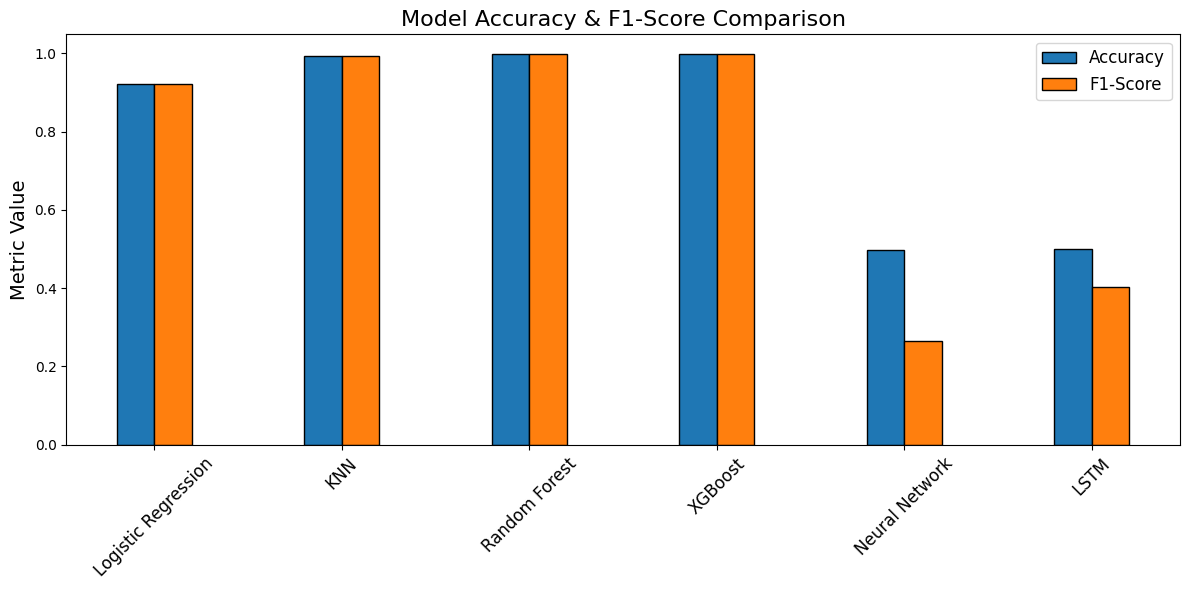

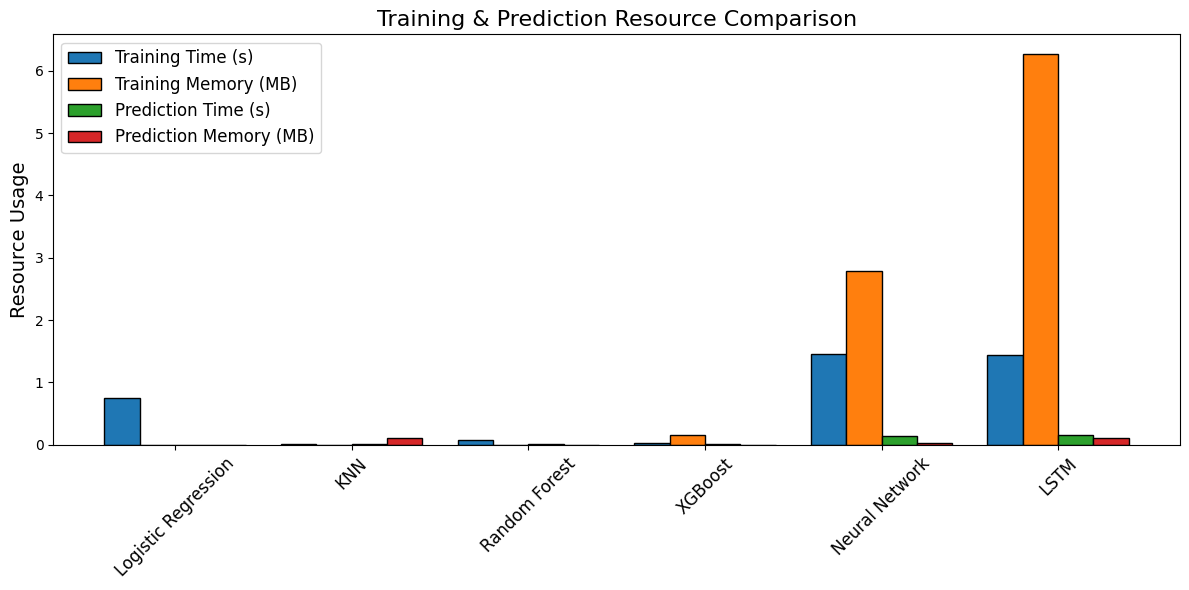

In [ ]:
import matplotlib.pyplot as plt

# Combined bar chart function for multiple metrics
def plot_combined_metrics(results_df, metrics, title, ylabel):
    plt.figure(figsize=(12, 6))
    bar_width = 0.2
    x = range(len(results_df['Model']))

    for i, metric in enumerate(metrics):
        plt.bar(
            [p + i * bar_width for p in x],
            results_df[metric],
            bar_width,
            label=metric,
            edgecolor='black'
        )

    plt.title(title, fontsize=16)
    plt.ylabel(ylabel, fontsize=14)
    plt.xticks([p + (len(metrics) - 1) * bar_width / 2 for p in x], results_df['Model'], rotation=45, fontsize=12)
    plt.legend(fontsize=12)
    plt.tight_layout()
    plt.show()

# Plot Accuracy and F1-Score in one figure
plot_combined_metrics(results_df_cv, ['Accuracy', 'F1-Score'], 'Model Accuracy & F1-Score Comparison', 'Metric Value')

# Plot Training and Prediction metrics in another figure
plot_combined_metrics(
    results_df_cv,
    ['Training Time (s)', 'Training Memory (MB)', 'Prediction Time (s)', 'Prediction Memory (MB)'],
    'Training & Prediction Resource Comparison',
    'Resource Usage'
)